In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import shapiro
import os

# Reading PCB sheets

In [2]:
sheets = ("blank_corrected", "lipid_normalized")
sheet = sheets[0]
pcb = pd.read_excel("./generated excels/pcb.xlsx", sheet_name=sheet)
c = pcb.columns.tolist()
c[0] = 'Units'
pcb.columns = c
pcb.set_index('Units', inplace=True)
selection = [i for i in pcb.index if i[:3] == 'PCB']
pcb = pcb.loc[selection, :]
pcb

,1,2,3,4,5,7,10,11,13-Trembleur
Units,,,,,,,,,
PCB-1,5.120000,10.770000,28.770000,26.070000,18.570000,7.210,5.95000,5.980000,20.07000
PCB-2,2.050000,4.240000,8.320000,12.030000,7.980000,5.600,2.68000,4.350000,13.53000
PCB-3,4.040000,9.480000,27.980000,21.280000,15.780000,12.080,6.23000,7.380000,21.78000
PCB-4,3.570000,9.350000,35.650000,31.050000,29.650000,1.310,1.10000,3.970000,6.75000
PCB-5,NaN,NaN,2.741400,1.561400,1.421400,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
PCB-205,0.153818,0.299818,2.402818,NaN,1.002818,NaN,NaN,0.730818,NaN
PCB-206,1.440090,3.220090,16.780090,3.550090,8.840090,NaN,1.11009,6.010090,2.74009
PCB-207,0.134818,0.792818,2.942818,0.505818,1.642818,NaN,NaN,1.002818,NaN


# Shapiro

In [3]:
shapi = pd.DataFrame(pcb.iloc[:, :2].copy())
shapi.columns = ['statistic', 'pvalue']
shapi
for i in pcb.index:
    shapi.loc[i, :] = shapiro(pcb.loc[i, :])
    if sum(pcb.loc[i, :].dropna().to_numpy() > 0) >= 3:
        shapi.loc[i, :] = shapiro(pcb.loc[i, :].dropna().to_numpy())

In [4]:
shapi2 = pd.DataFrame(index = ['statistics', 'pvalue'], columns = pcb.columns, dtype='double')
shapi2
for i in pcb.columns:
    shapi2.loc[:, i] = shapiro(pcb.loc[:, i].dropna().to_numpy())
shapi2

,1,2,3,4,5,7,10,11,13-Trembleur
statistics,5.020543e-01,5.851938e-01,5.668298e-01,5.544909e-01,4.684290e-01,3.938102e-01,5.240054e-01,4.871361e-01,6.642563e-01
pvalue,1.845591e-17,4.617700e-16,7.504369e-18,4.386655e-17,1.497352e-19,1.969849e-18,5.192457e-17,3.511964e-18,2.860335e-13


## repeating shapiro for each pcb sheet

In [5]:
sheets = ("blank_corrected", "lipid_normalized")
shapiro_dict = {}
for sheet in sheets:
    pcb = pd.read_excel("./generated excels/pcb.xlsx", sheet_name=sheet)
    c = pcb.columns.tolist()
    c[0] = 'Units'
    pcb.columns = c
    pcb.set_index('Units', inplace=True)
    selection = [i for i in pcb.index if i[:3] == 'PCB']
    pcb = pcb.loc[selection, :]

    shapi = pd.DataFrame(pcb.iloc[:, :2].copy())
    shapi.columns = ['statistic', 'pvalue']
    shapi
    for i in pcb.index:
        shapi.loc[i, :] = shapiro(pcb.loc[i, :])
        if sum(pcb.loc[i, :].dropna().to_numpy() > 0) >= 3:
            shapi.loc[i, :] = shapiro(pcb.loc[i, :].dropna().to_numpy())

    shapi2 = pd.DataFrame(index = ['statistics', 'pvalue'], columns = pcb.columns, dtype='double')
    shapi2
    for i in pcb.columns:
        shapi2.loc[:, i] = shapiro(pcb.loc[:, i].dropna().to_numpy())

    shapiro_dict.update({sheet: (shapi, shapi2)})

In [6]:
sheets = ("blank_corrected", "lipid_normalized")
shapiro_log = {}
for sheet in sheets:
    pcb = pd.read_excel("./generated excels/pcb.xlsx", sheet_name=sheet)
    c = pcb.columns.tolist()
    c[0] = 'Units'
    pcb.columns = c
    pcb.set_index('Units', inplace=True)
    selection = [i for i in pcb.index if i[:3] == 'PCB']
    pcb = np.log10(pcb.loc[selection, :])

    shapi = pd.DataFrame(pcb.iloc[:, :2].copy())
    shapi.columns = ['statistic', 'pvalue']
    shapi
    for i in pcb.index:
        shapi.loc[i, :] = shapiro(pcb.loc[i, :])
        if sum(pcb.loc[i, :].dropna().to_numpy() > 0) >= 3:
            shapi.loc[i, :] = shapiro(pcb.loc[i, :].dropna().to_numpy())

    shapi2 = pd.DataFrame(index = ['statistics', 'pvalue'], columns = pcb.columns, dtype='double')
    shapi2
    for i in pcb.columns:
        shapi2.loc[:, i] = shapiro(pcb.loc[:, i].dropna().to_numpy())

    shapiro_log.update({sheet: (shapi, shapi2)})

/Users/minahassanaghaei/opt/anaconda3/lib/python3.9/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: divide by zero encountered in log10
  result = func(self.values, **kwargs)
/Users/minahassanaghaei/opt/anaconda3/lib/python3.9/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: divide by zero encountered in log10
  result = func(self.values, **kwargs)


In [7]:
with pd.ExcelWriter('pcb_stats.xlsx') as writer:
    for sheet in sheets:
        for i in range(2):
            shapiro_dict[sheet][i].to_excel(writer, f'shapiro{i} - {sheet}')
            shapiro_log[sheet][i].to_excel(writer, f'shapiro{i} - {sheet}')

# Proportion Plots

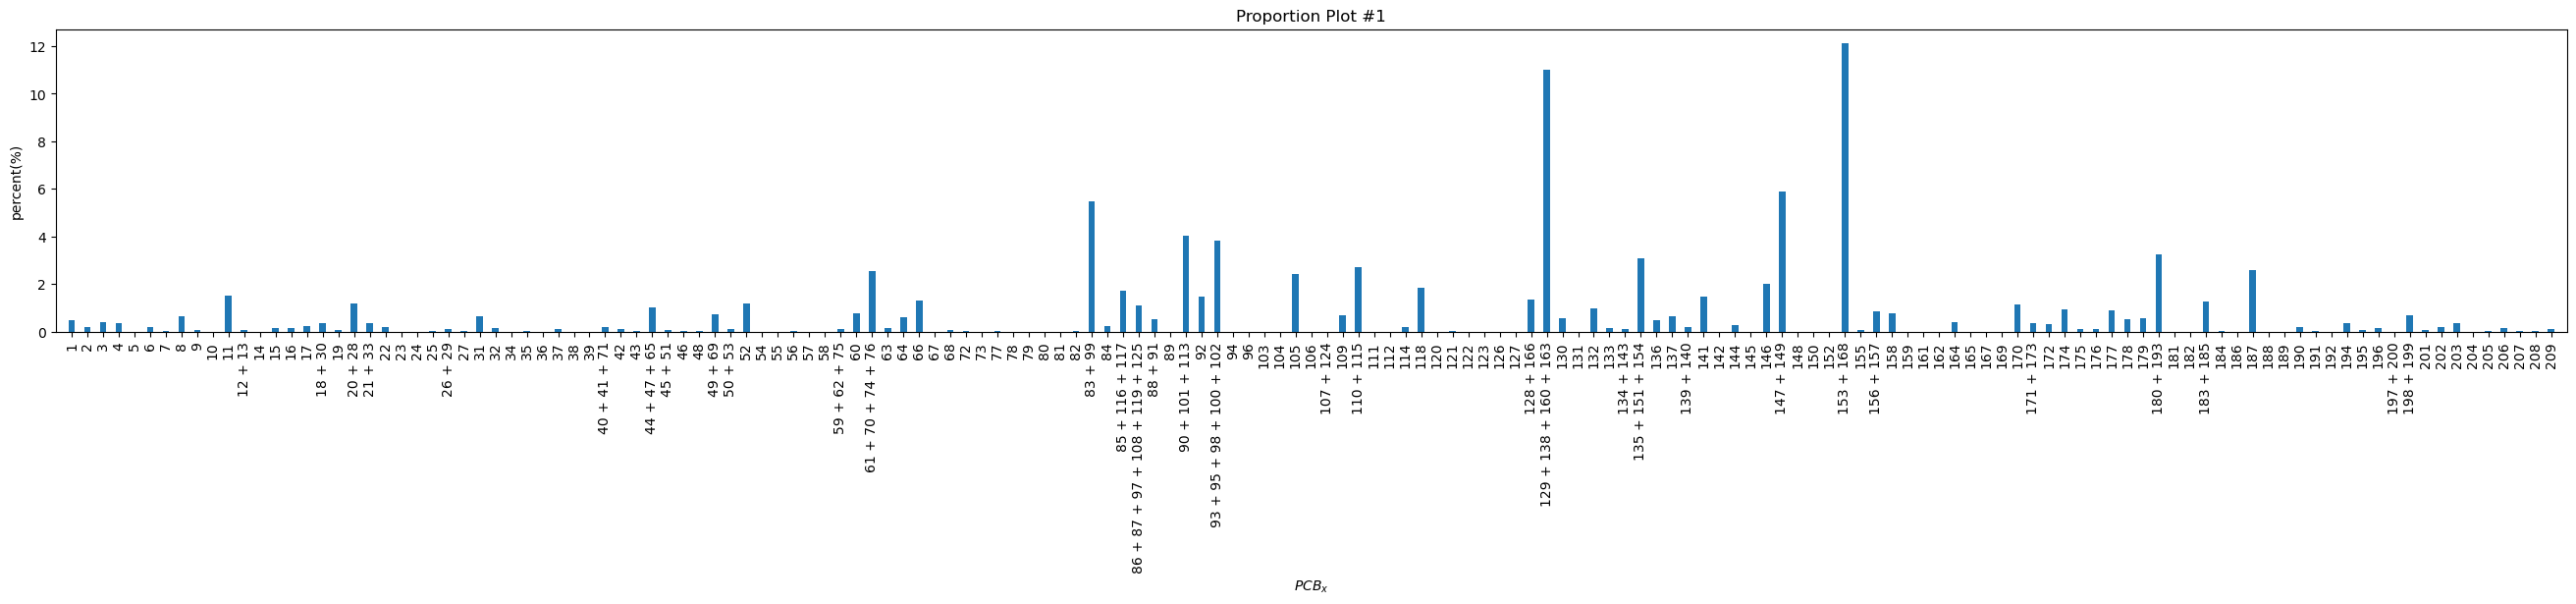

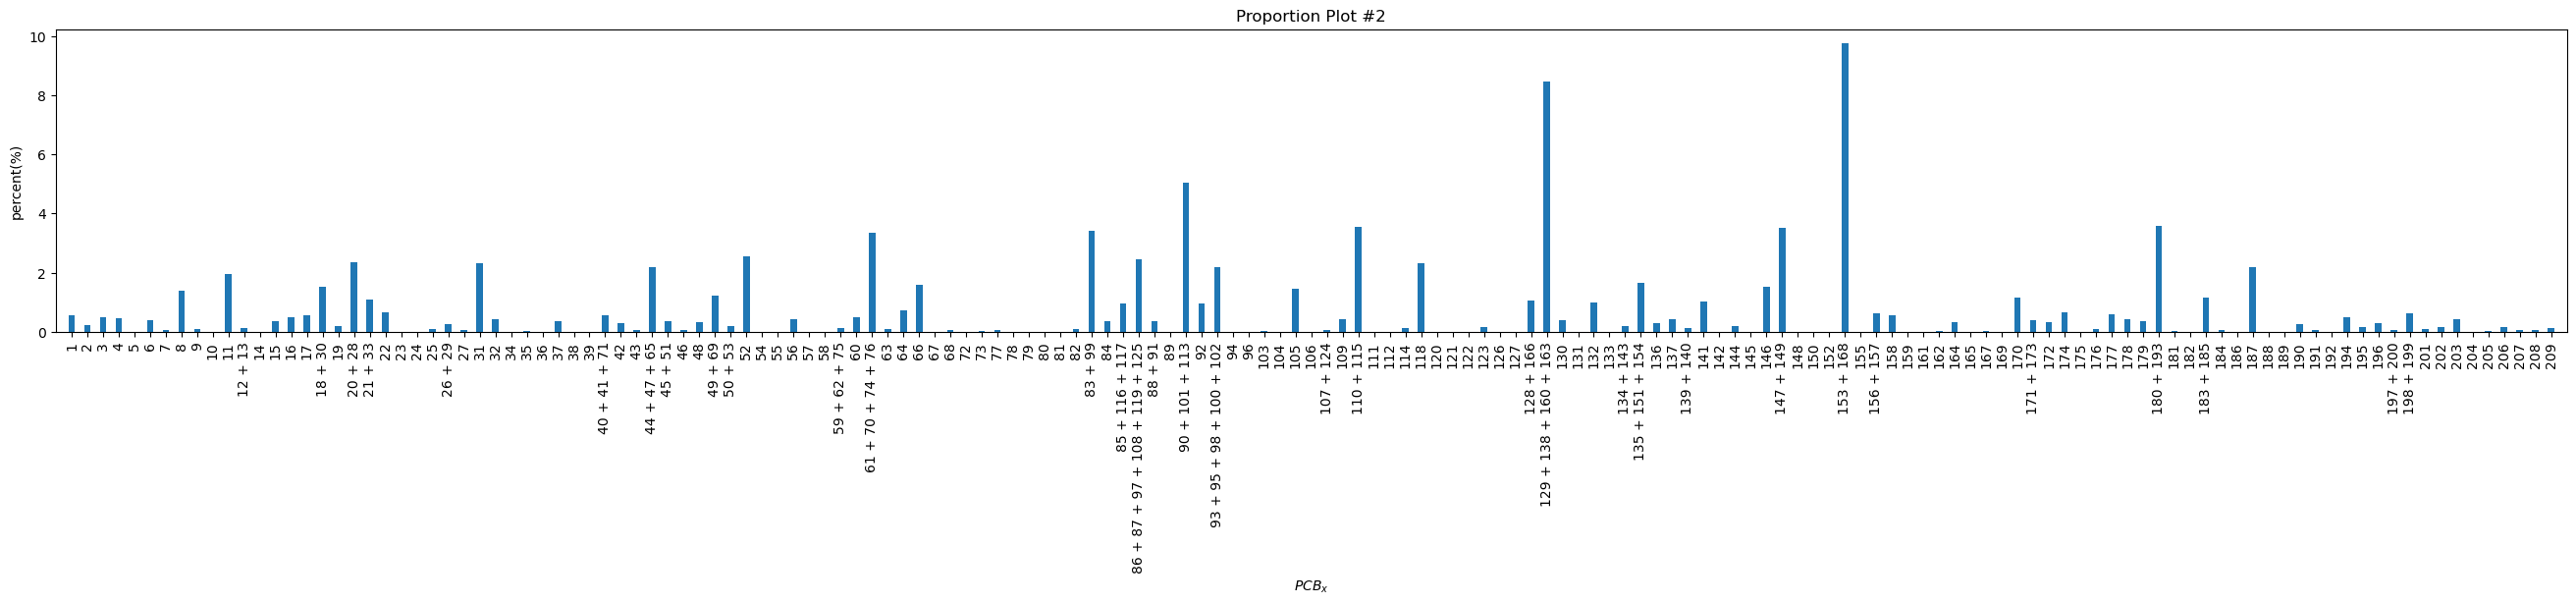

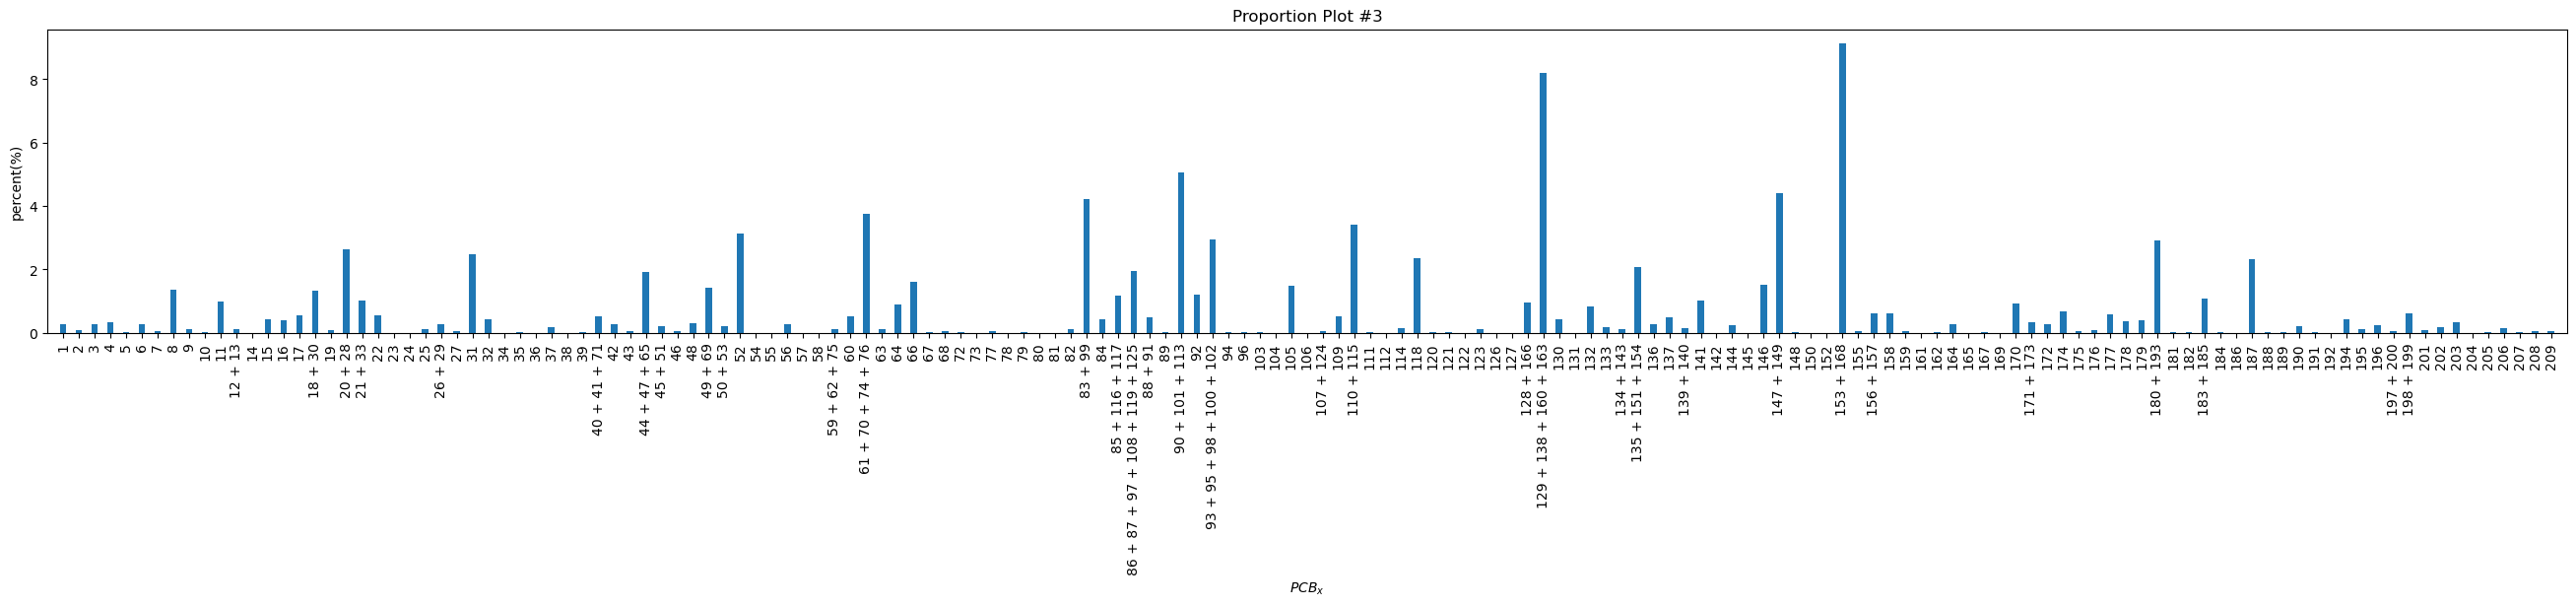

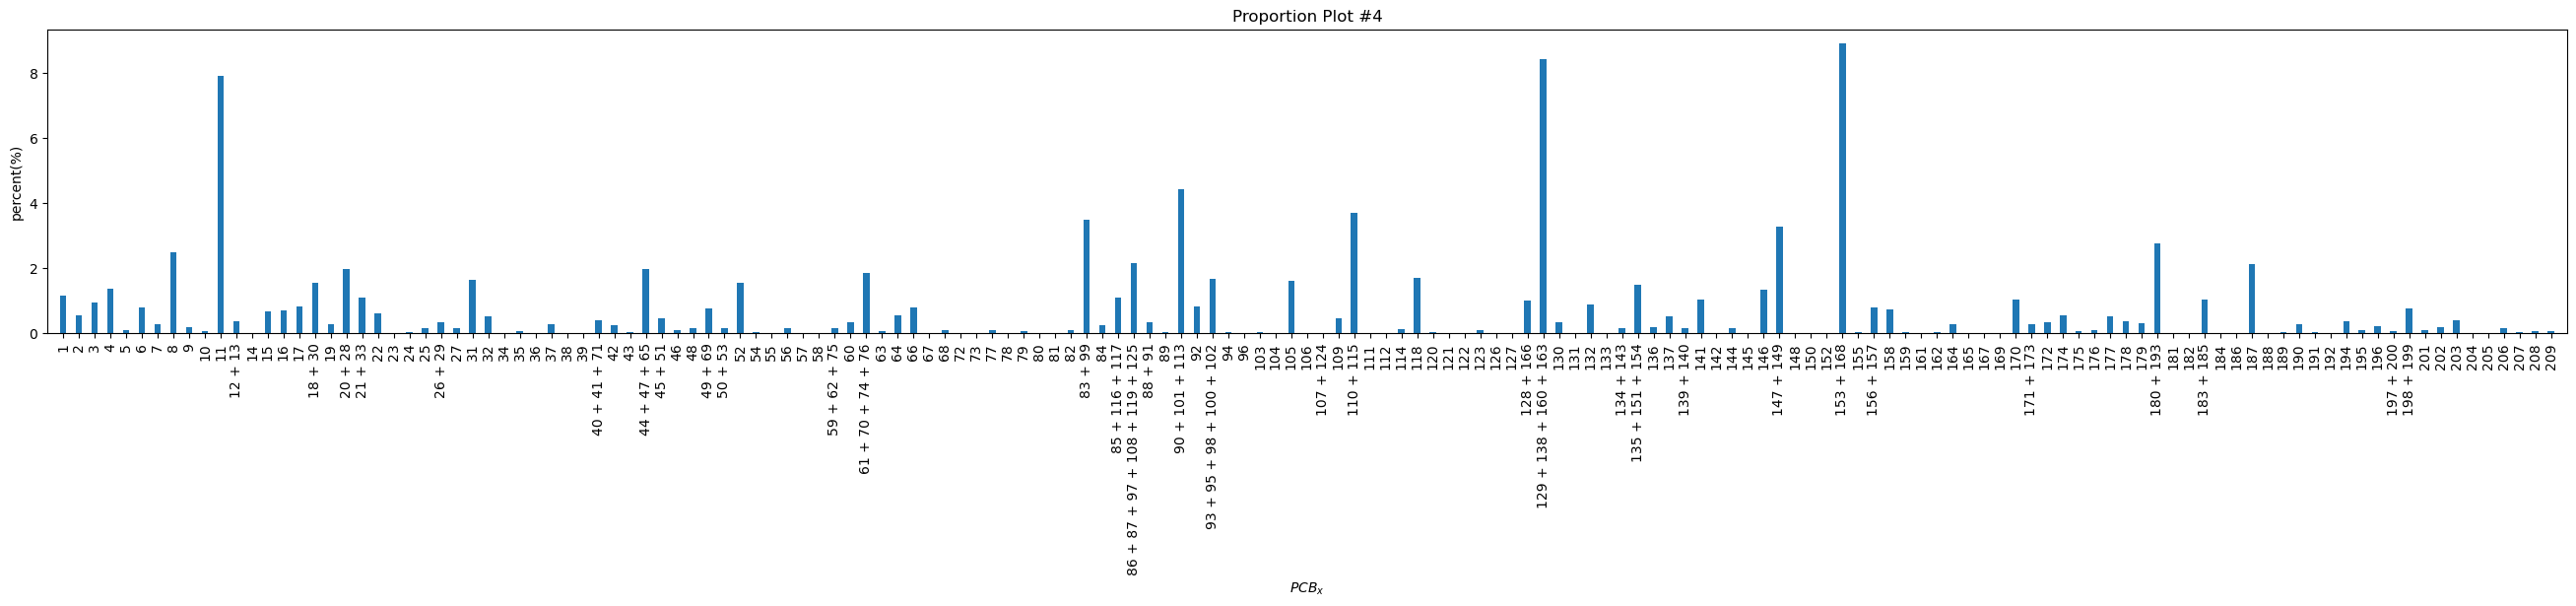

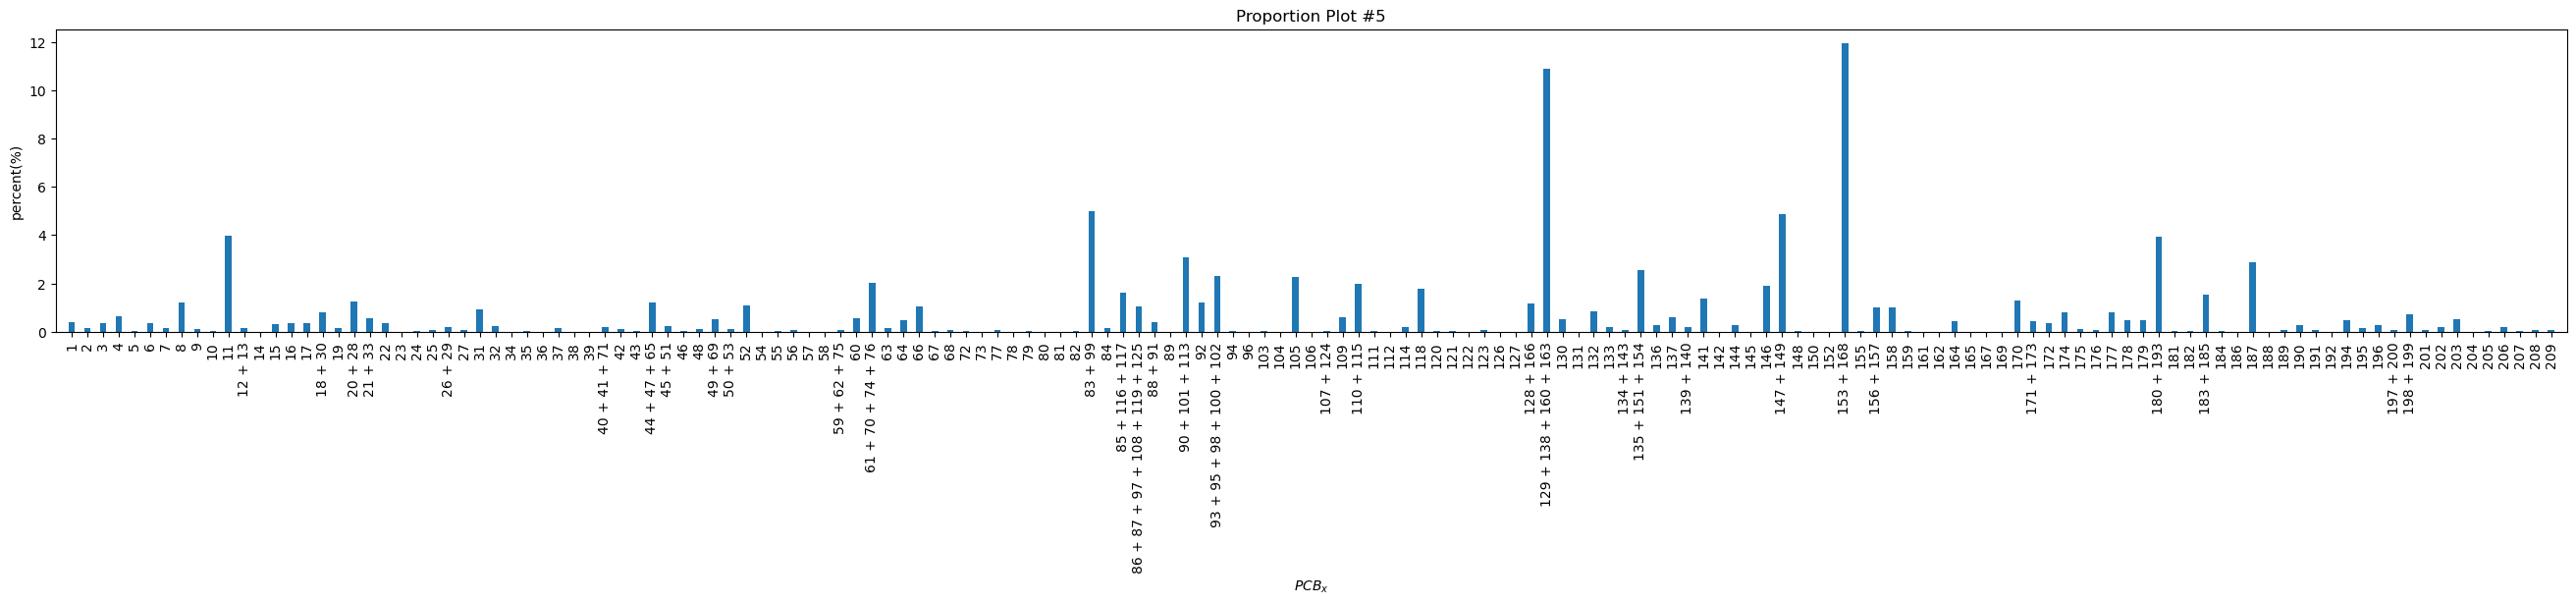

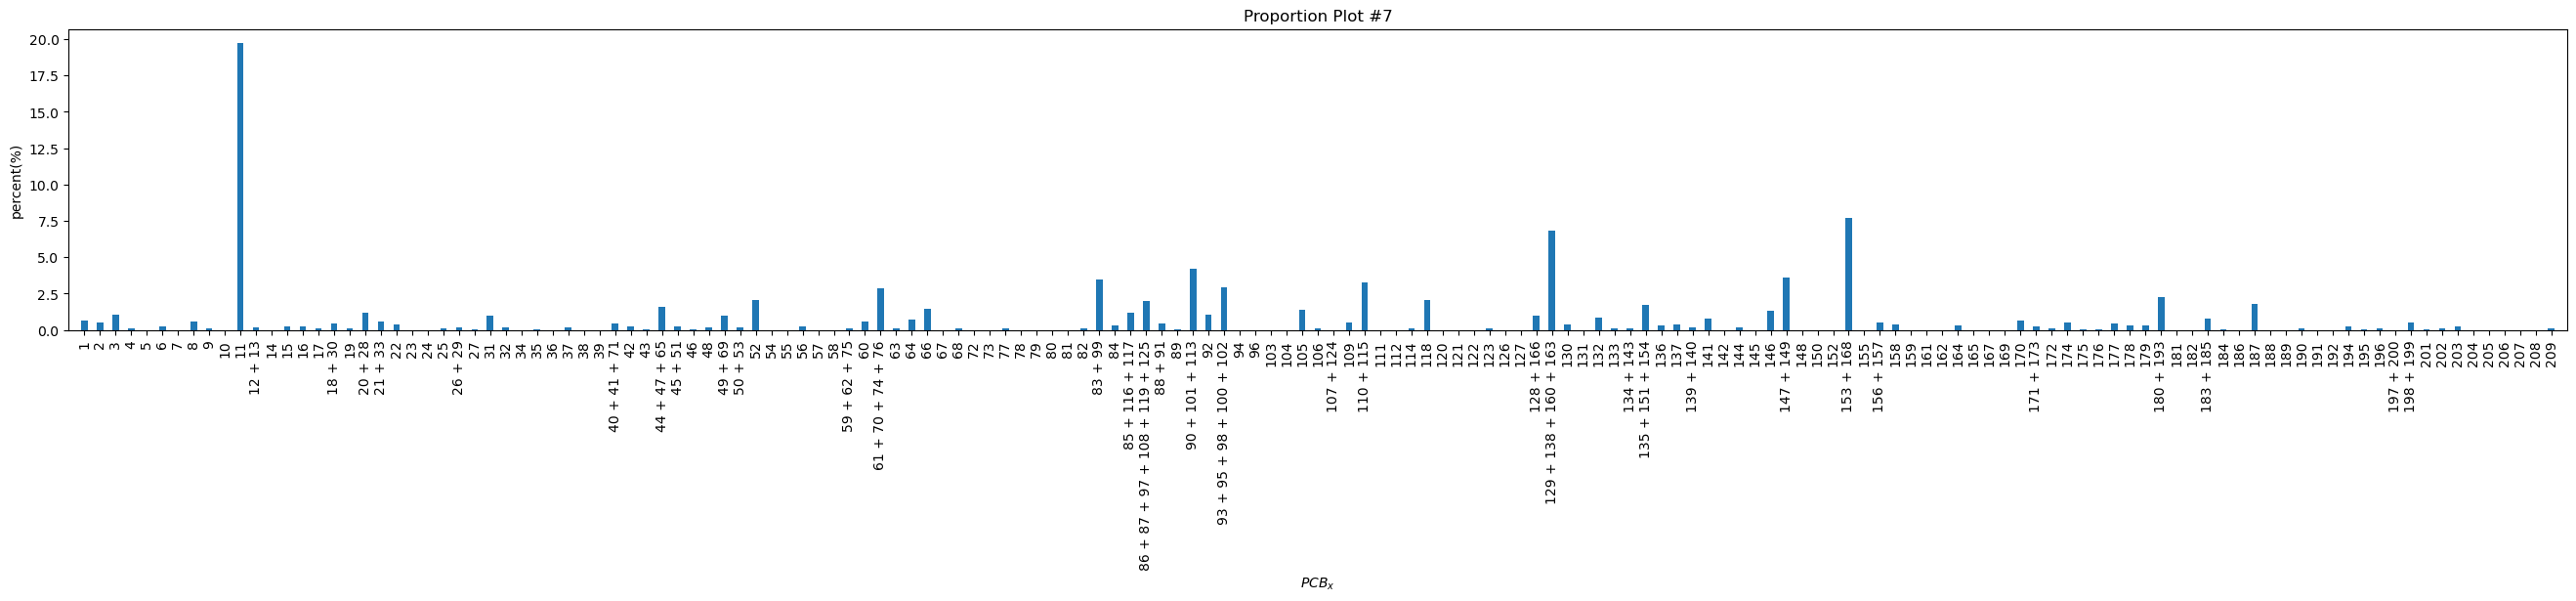

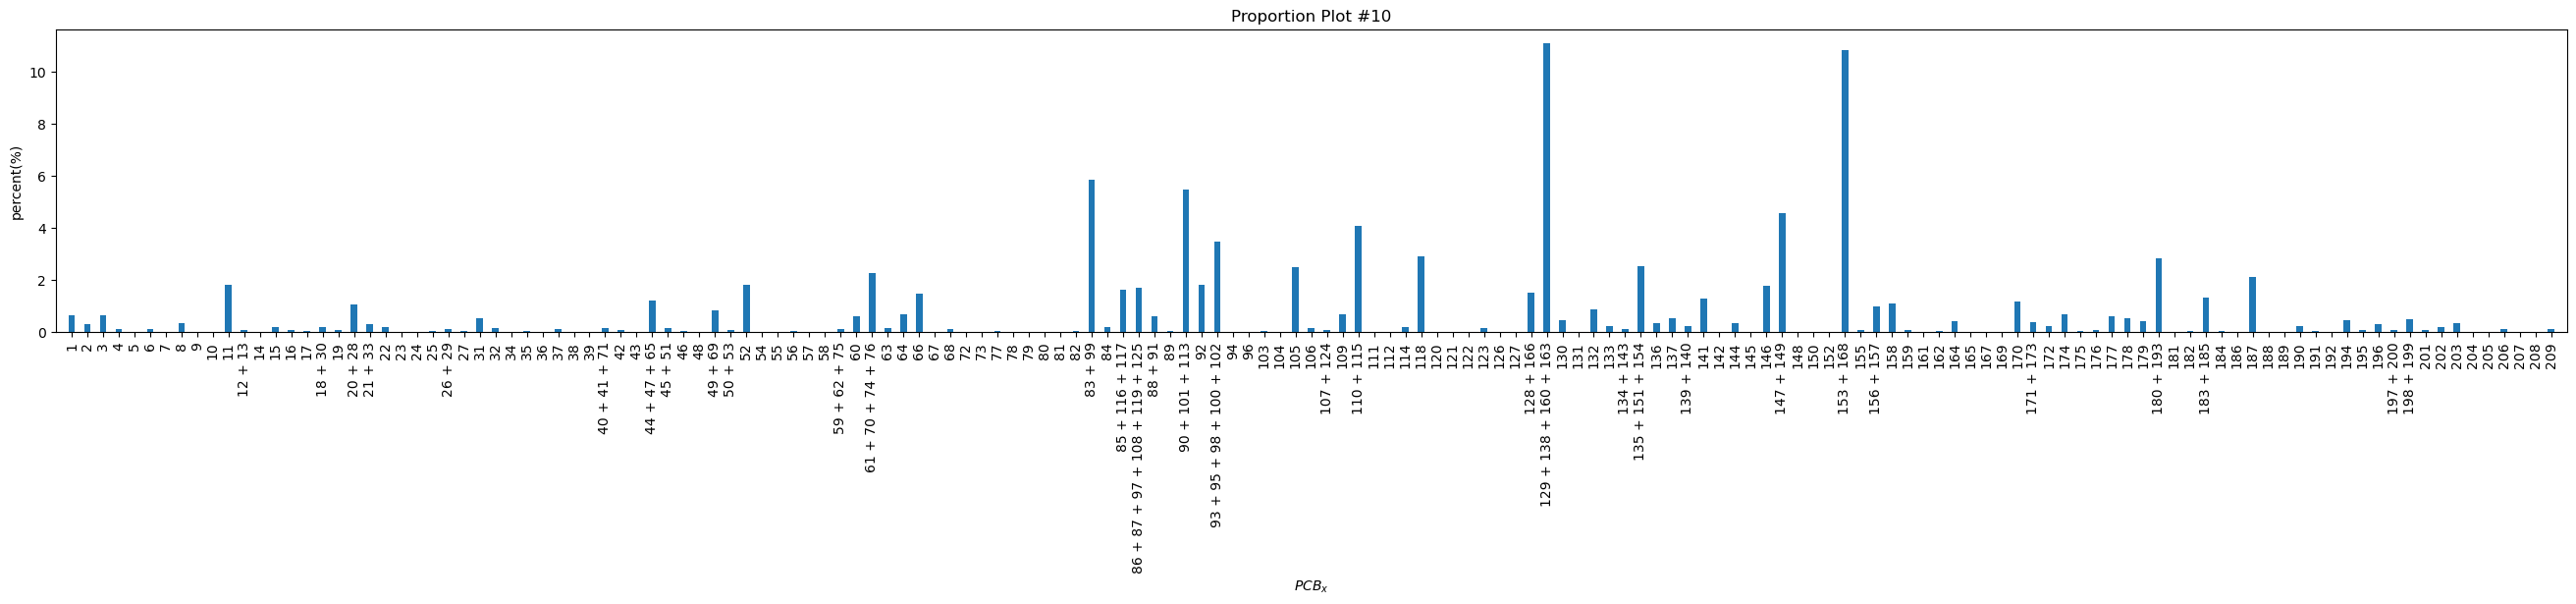

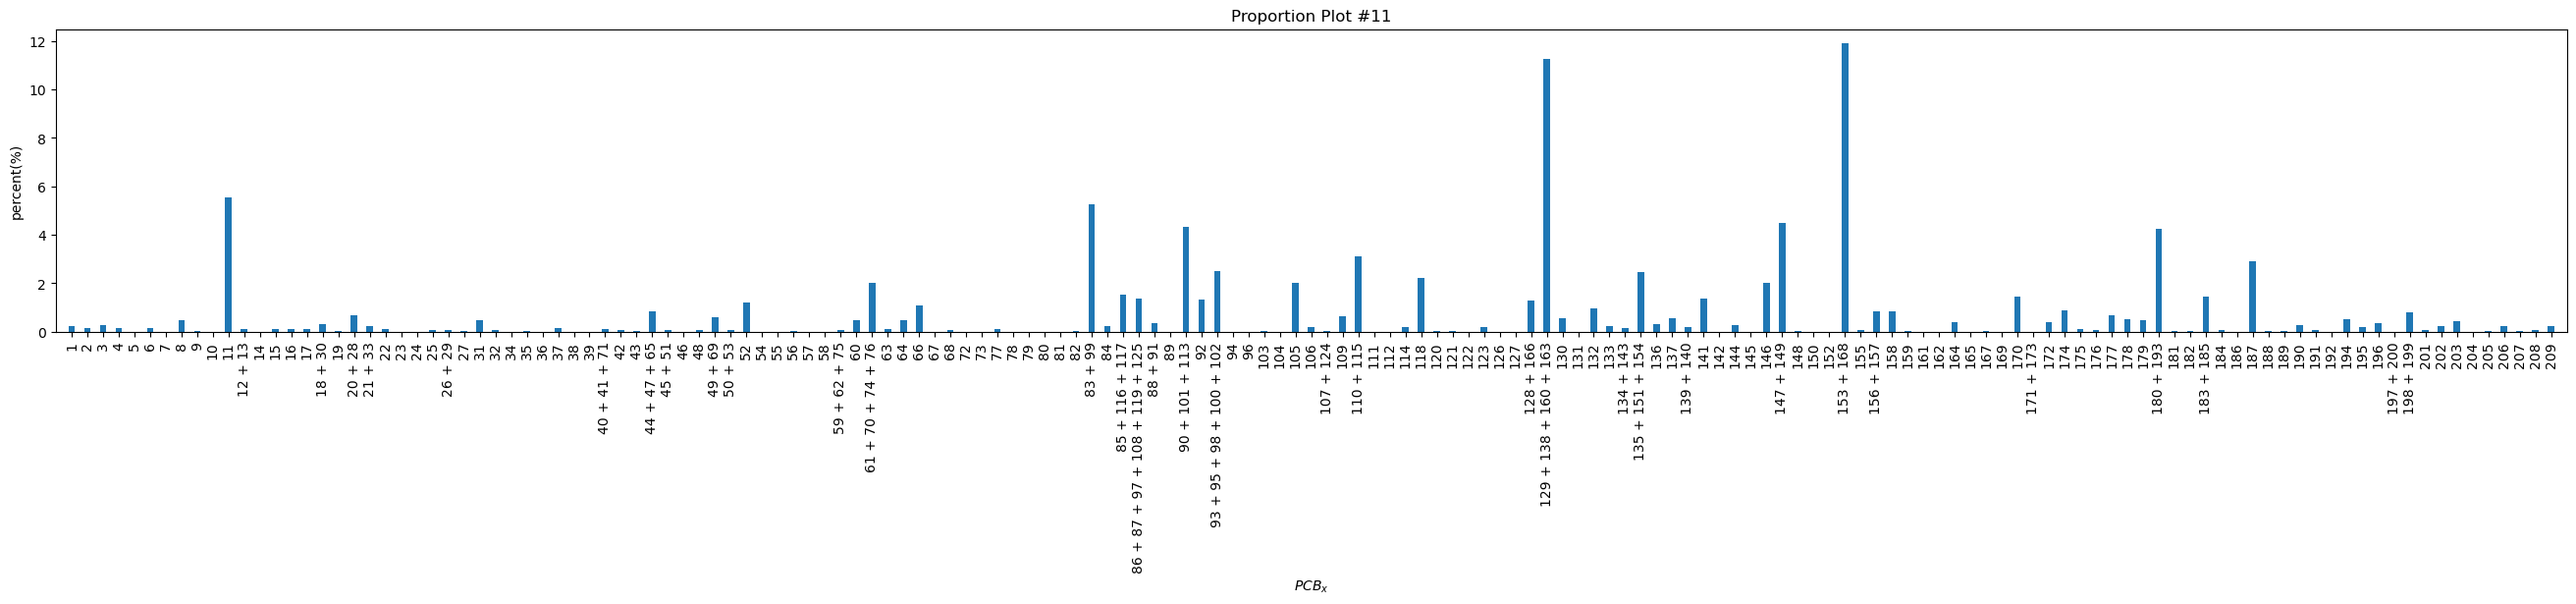

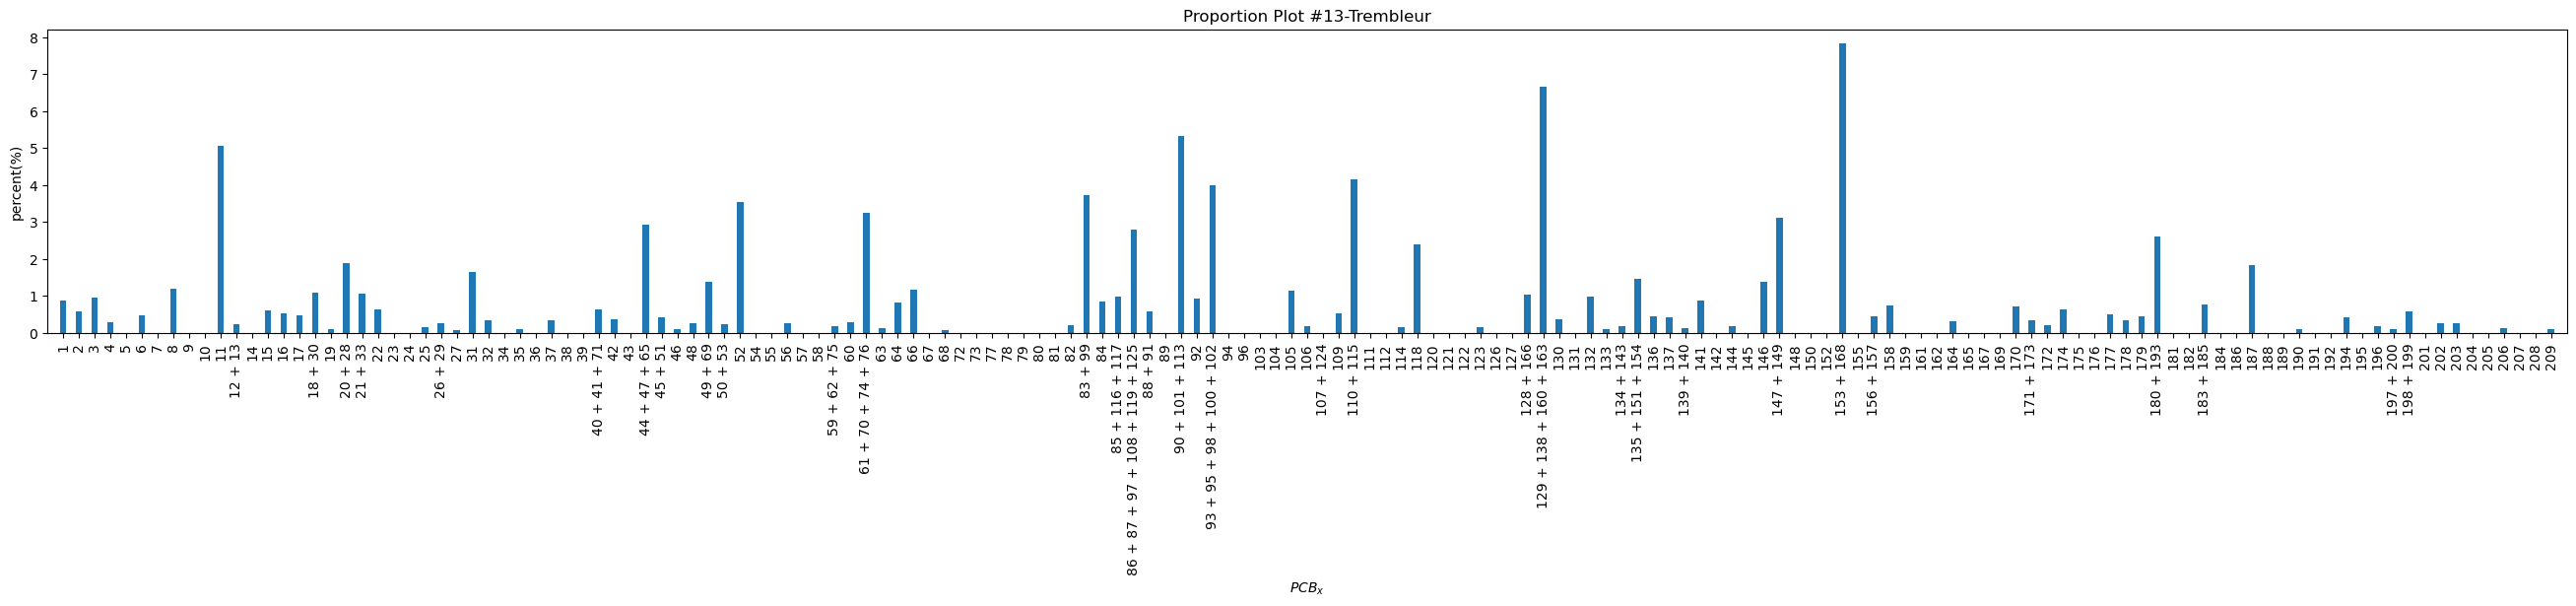

In [8]:
sheets = ("blank_corrected", "lipid_normalized")
sheet = sheets[1]
pcb = pd.read_excel("./generated excels/pcb.xlsx", sheet_name=sheet)
c = pcb.columns.tolist()
c[0] = 'Units'
pcb.columns = c
pcb.set_index('Units', inplace=True)
selection = [i for i in pcb.index if i[:3] == 'PCB']
pcb = pcb.loc[selection, :]
for col in pcb.columns:
    temp = pcb[col]
    temp = temp/temp.sum()*100
    plt.figure(figsize=(33, 4), facecolor="white")
    plt.bar(range(len(pcb.index)), temp.to_numpy(), .42)
    plt.title('Proportion Plot #' + col)
    plt.xticks(range(len(pcb.index)), pcb.index.str.replace('PCB-', ''), rotation = 90)
    plt.xlim(-1, len(pcb.index))
    plt.ylabel('percent(%)')
    plt.xlabel('$PCB_x$')
    if not os.path.exists('./pics/PCBs/bars/'):
        os.mkdir('./pics/PCBs/bars/')
    plt.savefig(f'./pics/PCBs/bars/{col}-proportion.jpg', bbox_inches='tight')

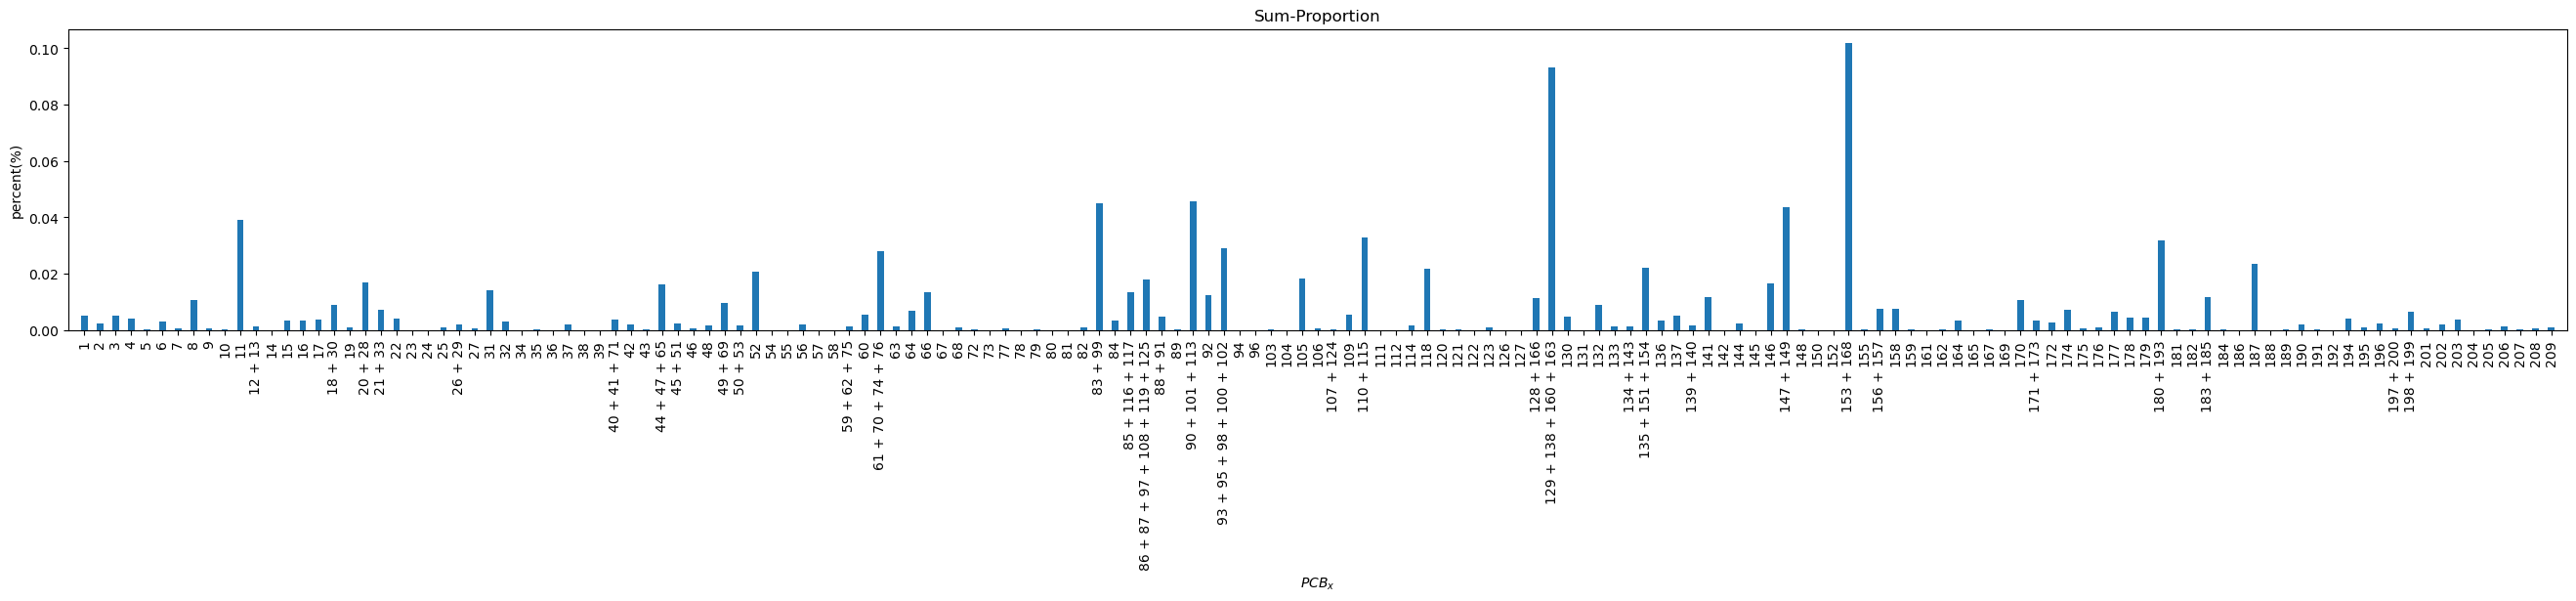

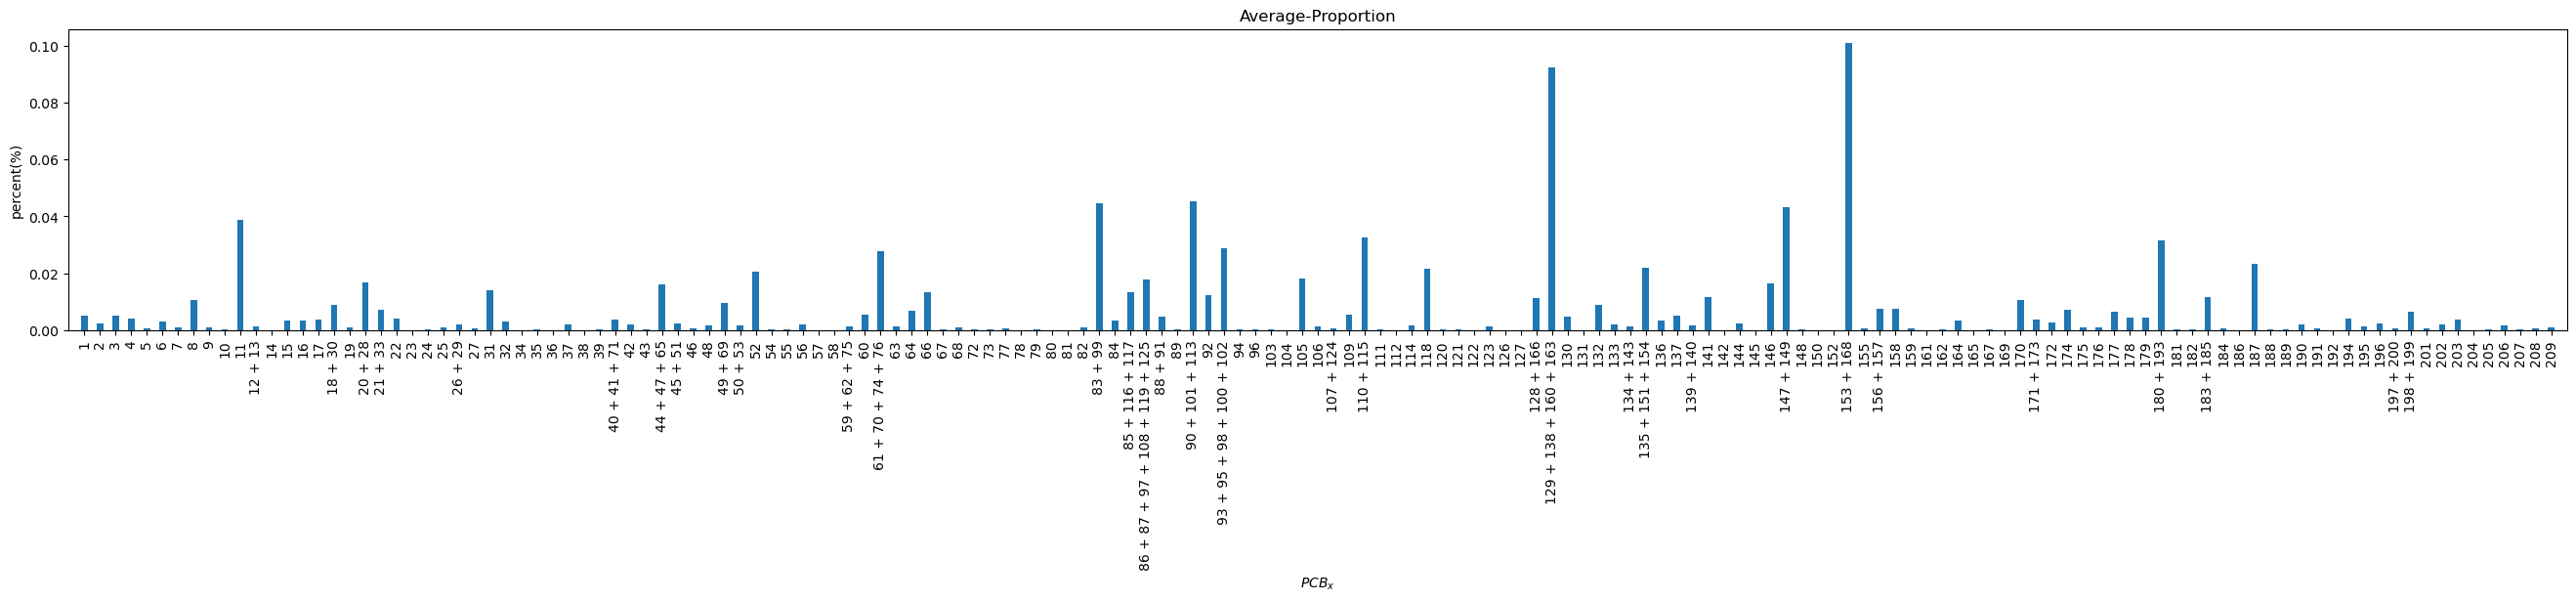

In [9]:
sheets = ("blank_corrected", "lipid_normalized")
sheet = sheets[1]
pcb = pd.read_excel("./generated excels/pcb.xlsx", sheet_name=sheet)
c = pcb.columns.tolist()
c[0] = 'Units'
pcb.columns = c
pcb.set_index('Units', inplace=True)
selection = [i for i in pcb.index if i[:3] == 'PCB']
pcb = pcb.loc[selection, :]
temp = pcb.sum(1)
temp = temp/temp.sum()
plt.figure(figsize=(33, 4), facecolor="white")
plt.bar(range(len(pcb.index)), temp.to_numpy(), .42)
plt.title('Sum-Proportion')
plt.xticks(range(len(pcb.index)), pcb.index.str.replace('PCB-', ''), rotation = 90)
plt.xlim(-1, len(pcb.index))
plt.ylabel('percent(%)')
plt.xlabel('$PCB_x$')
if not os.path.exists('./pics/PCBs/bars/'):
    os.mkdir('./pics/PCBs/bars/')
plt.savefig(f'./pics/PCBs/bars/SUM-proportion.jpg', bbox_inches='tight')

temp = pcb.apply(lambda x: np.average(x.dropna()) if not x.dropna().empty else 0, 1)
temp = temp/temp.sum()
plt.figure(figsize=(33, 4), facecolor="white")
plt.bar(range(len(pcb.index)), temp.to_numpy(), .42)
plt.title('Average-Proportion')
plt.xticks(range(len(pcb.index)), pcb.index.str.replace('PCB-', ''), rotation = 90)
plt.xlim(-1, len(pcb.index))
plt.ylabel('percent(%)')
plt.xlabel('$PCB_x$')
plt.savefig(f'./pics/PCBs/bars/average-proportion.jpg', bbox_inches='tight')

# Concentration Plots

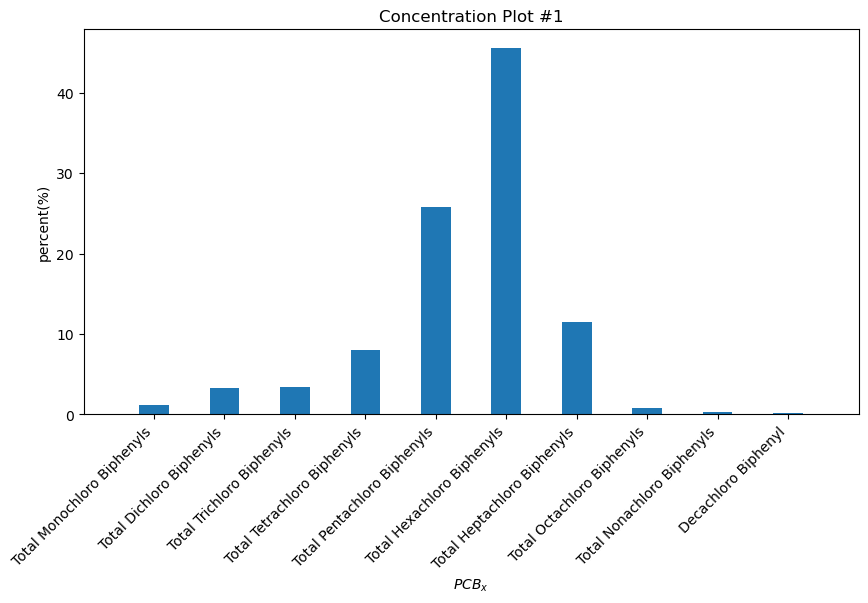

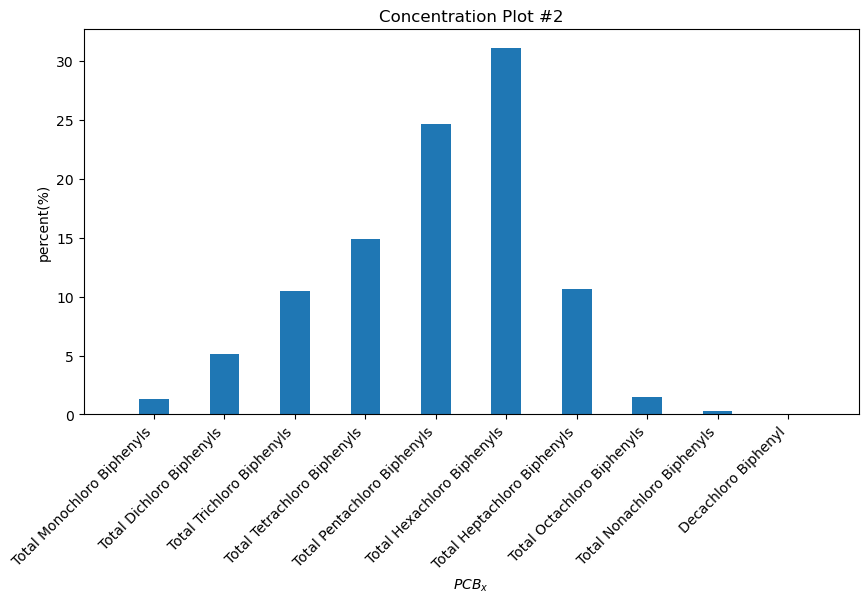

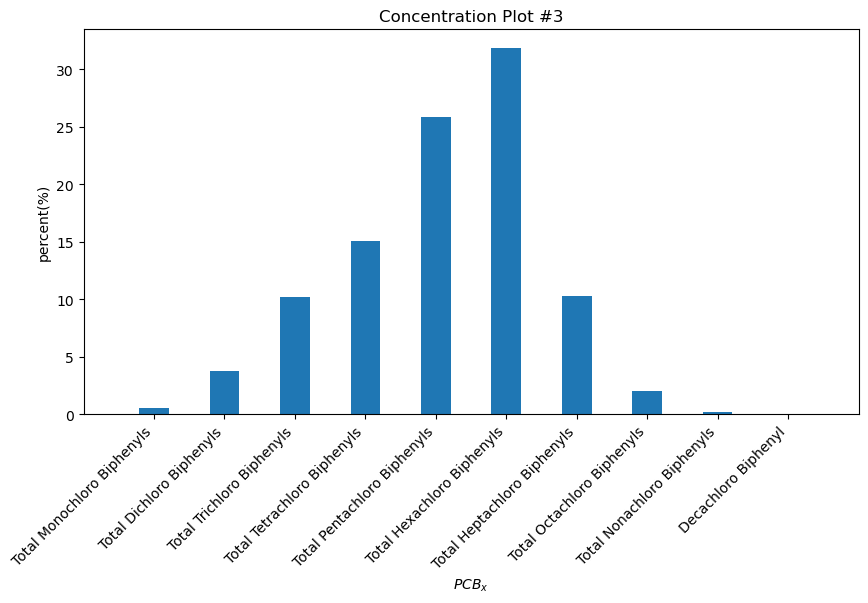

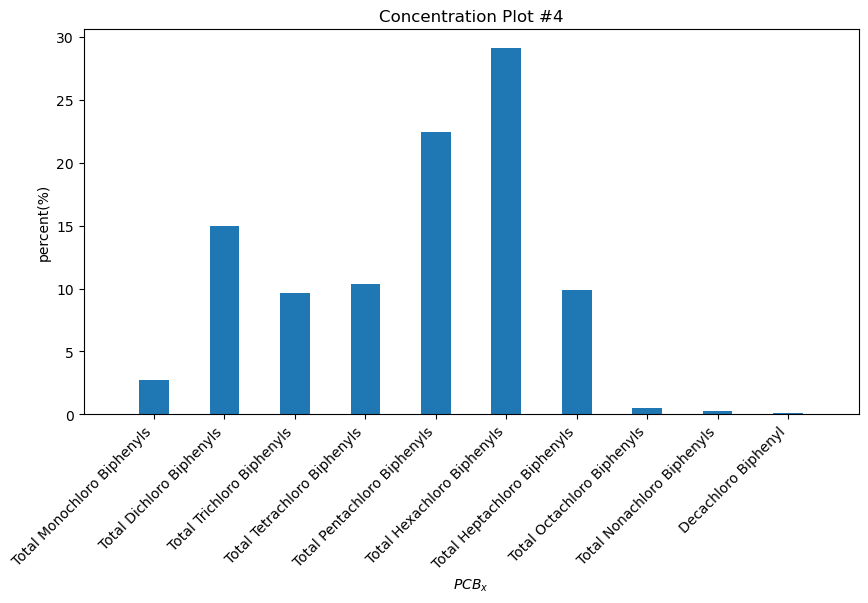

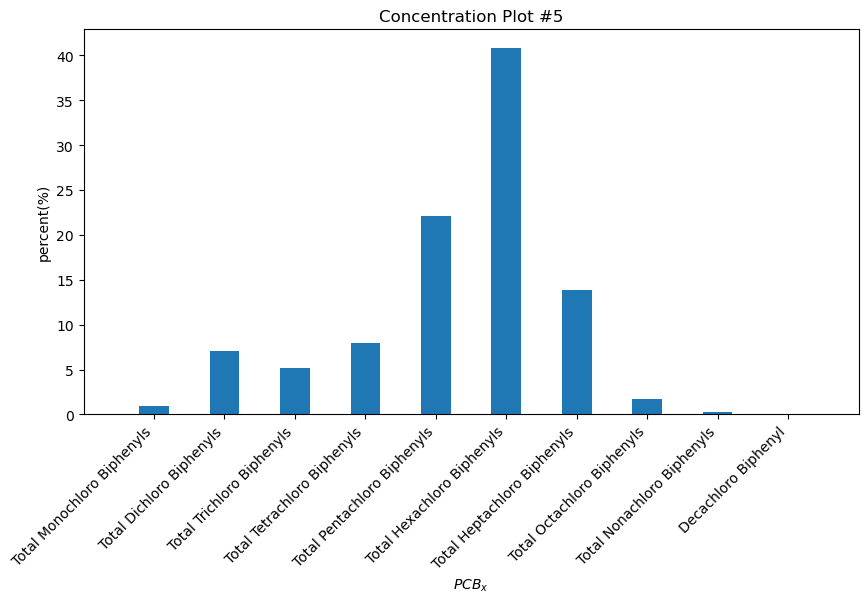

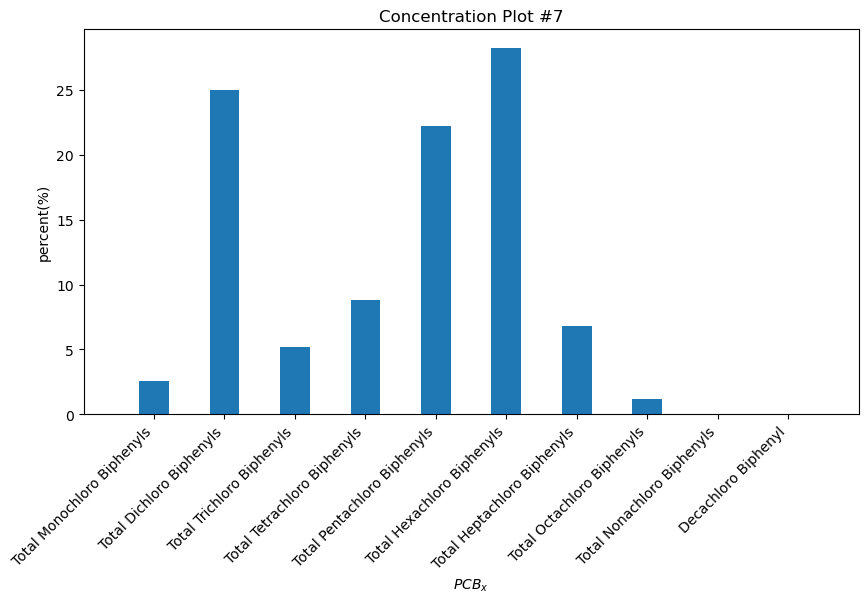

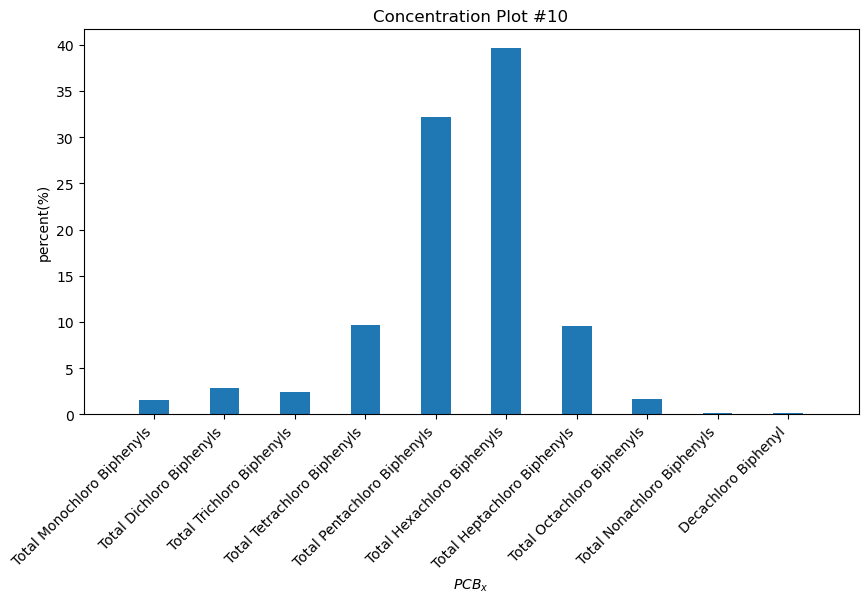

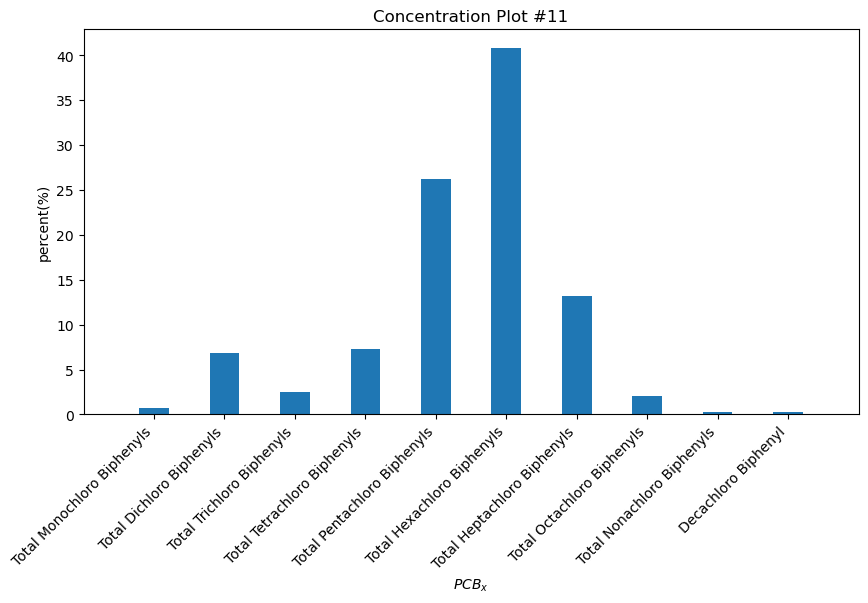

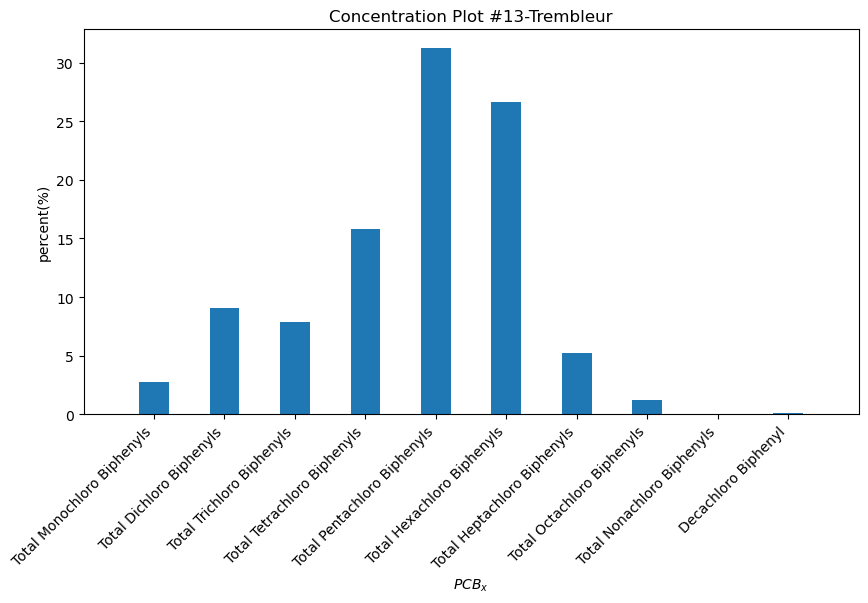

In [10]:
sheets = ("blank_corrected", "lipid_normalized")
sheet = sheets[1]
pcb = pd.read_excel("./generated excels/pcb.xlsx", sheet_name=sheet)
c = pcb.columns.tolist()
c[0] = 'Units'
pcb.columns = c
pcb.set_index('Units', inplace=True)
selection = [i for i in pcb.index if i[:3] != 'PCB']
pcb = pcb.loc[selection, :]
pcb = pcb.iloc[:-2, :]
for col in pcb.columns:
    temp = pcb[col]
    temp = temp/temp.sum()*100
    plt.figure(figsize=(10, 5), facecolor="white")
    plt.bar(range(len(pcb.index)), temp.to_numpy(), .42)
    plt.title('Concentration Plot #' + col)
    plt.xticks(range(len(pcb.index)), pcb.index, rotation = 45, ha='right')
    plt.xlim(-1, len(pcb.index))
    plt.ylabel('percent(%)')
    plt.xlabel('$PCB_x$')
    if not os.path.exists('./pics/PCBs/bars/'):
        os.mkdir('./pics/PCBs/bars/')
    plt.savefig(f'./pics/PCBs/bars/{col}-concentration.jpg', bbox_inches='tight')

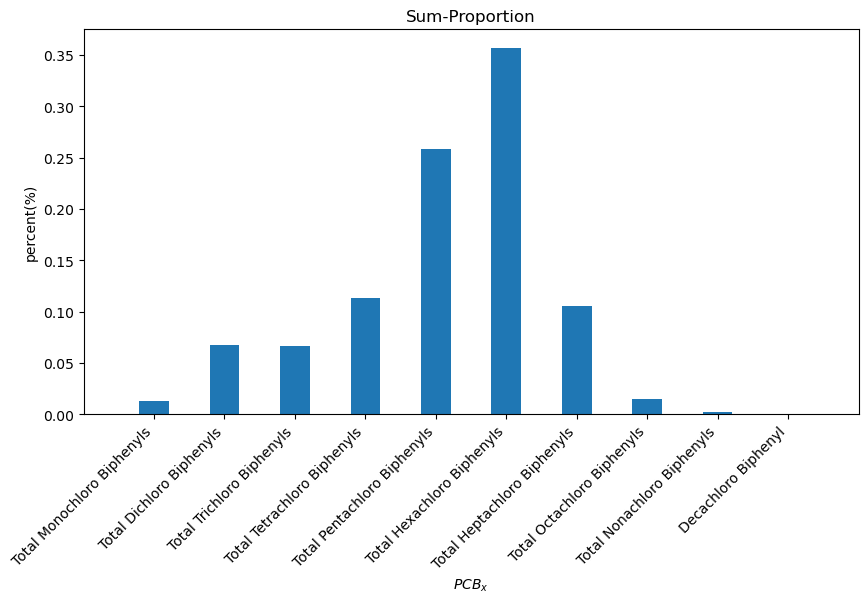

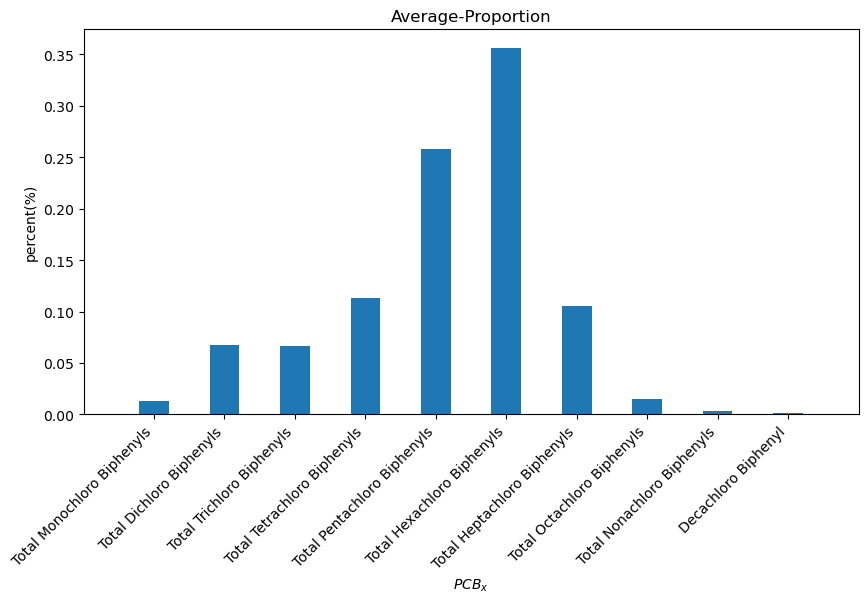

In [11]:
sheets = ("blank_corrected", "lipid_normalized")
sheet = sheets[1]
pcb = pd.read_excel("./generated excels/pcb.xlsx", sheet_name=sheet)
c = pcb.columns.tolist()
c[0] = 'Units'
pcb.columns = c
pcb.set_index('Units', inplace=True)
selection = [i for i in pcb.index if i[:3] != 'PCB']
pcb = pcb.loc[selection, :]
pcb = pcb.iloc[:-2, :]

temp = pcb.sum(1)
temp = temp/temp.sum()
plt.figure(figsize=(10, 5), facecolor="white")
plt.bar(range(len(pcb.index)), temp.to_numpy(), .42)
plt.title('Sum-Proportion')
plt.xticks(range(len(pcb.index)), pcb.index.str.replace('PCB-', ''), rotation = 45, ha = 'right')
plt.xlim(-1, len(pcb.index))
plt.ylabel('percent(%)')
plt.xlabel('$PCB_x$')
if not os.path.exists('./pics/PCBs/bars/'):
    os.mkdir('./pics/PCBs/bars/')
plt.savefig(f'./pics/PCBs/bars/SUM-concentration.jpg', bbox_inches='tight')

temp = pcb.apply(lambda x: np.average(x.dropna()) if not x.dropna().empty else 0, 1)
temp = temp/temp.sum()
plt.figure(figsize=(10, 5), facecolor="white")
plt.bar(range(len(pcb.index)), temp.to_numpy(), .42)
plt.title('Average-Proportion')
plt.xticks(range(len(pcb.index)), pcb.index.str.replace('PCB-', ''), rotation = 45, ha = 'right')
plt.xlim(-1, len(pcb.index))
plt.ylabel('percent(%)')
plt.xlabel('$PCB_x$')
plt.savefig(f'./pics/PCBs/bars/average-concentration.jpg', bbox_inches='tight')